In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math

import matplotlib
matplotlib.rc('font',family='NanumGothic')
from scipy.stats import chi2_contingency
from scipy.stats import chi2

df_oxidation = pd.read_csv('./dataset_origin/Oxidation.csv')
df_photo_soft = pd.read_csv('./dataset_origin/Photo_softbake.csv')
df_photo_litho = pd.read_csv('./dataset_origin/Photo_lithograpy.csv')
df_etching = pd.read_csv('./dataset_origin/Etching.csv')
df_ion = pd.read_csv('./dataset_origin/Ion_Implantation.csv')
df_inspect = pd.read_csv('./dataset_origin/final_data.csv')

print(len(df_inspect))

1702


In [300]:
path = []
for i in range(len(df_inspect)):
    temp = ''
    temp = str(df_oxidation['Ox_Chamber'][i]) + str(df_photo_soft['photo_soft_Chamber'][i]) + \
    str(df_photo_litho['lithography_Chamber'][i]) + str(df_etching['Etching_Chamber'][i]) + \
    str(df_ion['Chamber_Num'][i])
    path.append(temp)
    
print(len(path))

df_inspect['Path'] = path
df_inspect

1702


,Unnamed: 0,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,...,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Error_message,Wafer_map,Path
0,0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120.00,...,3.011187e+17,6.000012e+17,30795.934,103.433,854.0,154,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,21111
1,1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137.00,...,3.026639e+17,6.000008e+17,32135.618,105.552,895.0,156,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,21122
2,2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116.00,...,2.983347e+17,5.999989e+17,31057.895,102.598,898.0,152,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,21133
3,3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143.00,...,2.999225e+17,5.999997e+17,32140.566,102.963,879.0,155,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,21111
4,4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76.00,...,3.018136e+17,6.000004e+17,31986.009,101.419,882.0,155,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,21122
5,5,NOLSM330136330,2,Oxidation,dry,1311.225435,O2,41.03,0.213,114.00,...,2.993570e+17,5.999966e+17,31982.632,103.847,871.0,152,96,none,[[0 0 0 0 0 0 0 0 0 0 2 2 1 1 2 1 0 0 0 0 0 0 ...,21133
6,6,NOLSM331137331,2,Oxidation,dry,938.276677,O2,30.24,0.211,116.00,...,2.989981e+17,5.999990e+17,32499.229,102.840,916.0,157,115,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,21111
7,7,NOLSM332138332,2,Oxidation,dry,1033.815333,O2,30.45,0.199,218.00,...,3.001836e+17,5.999995e+17,32016.390,104.368,891.0,153,167,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 1 0 0 0 0 0 0 ...,21122
8,8,NOLSM333139333,2,Oxidation,wet,1154.565473,H2O,32.35,0.217,119.00,...,3.013753e+17,6.000017e+17,31810.414,103.625,903.0,153,45,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 2 0 0 0 0 0 0 ...,21133
9,9,NOLSM3341310334,2,Oxidation,wet,992.357358,H2O,35.26,0.202,111.77,...,3.000877e+17,6.000019e+17,31969.699,102.847,883.0,161,54,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 2 0 0 0 0 0 0 ...,21211


In [301]:
df_inspect['Datetime']

0       01-03-2019
1       01-03-2019
2       01-03-2019
3       01-03-2019
4       01-03-2019
5       01-03-2019
6       01-03-2019
7       01-03-2019
8       01-03-2019
9       01-03-2019
10      01-03-2019
11      01-03-2019
12      01-03-2019
13      01-03-2019
14      01-03-2019
15      01-03-2019
16      01-03-2019
17      01-03-2019
18      01-03-2019
19      01-03-2019
20      01-03-2019
21      01-03-2019
22      01-03-2019
23      01-03-2019
24      01-03-2019
25      01-03-2019
26      01-03-2019
27      01-03-2019
28      01-03-2019
29      01-03-2019
30      01-03-2019
31      01-03-2019
32      01-03-2019
33      01-03-2019
34      01-03-2019
35      01-03-2019
36      01-03-2019
37      01-03-2019
38      01-03-2019
39      01-03-2019
40      01-03-2019
41      01-03-2019
42      01-03-2019
43      01-03-2019
44      01-03-2019
45      01-03-2019
46      01-03-2019
47      01-03-2019
48      01-03-2019
49      01-03-2019
50      01-03-2019
51      01-03-2019
52      01-0

In [302]:
all_path=set(path)
all_path=[s for s in all_path]
all_pd_path=pd.DataFrame(all_path)
all_pd_path

,0
0,33122
1,12122
2,23111
3,33111
4,11322
5,32111
6,23122
7,32333
8,32133
9,23233


In [303]:
all_path=set(path)
all_path=[s for s in all_path]
all_pd_path=pd.DataFrame(all_path,columns=['Path'])
data_list=[]
for c in all_path:
    data_by_path= pd.DataFrame()
    for i in range(len(df_inspect)):
        if df_inspect.loc[i,['Path']][0]==c:
            a=pd.DataFrame(df_inspect.loc[i])
            data_by_path=pd.concat([data_by_path,a],axis=1)

    data_list.append(data_by_path.transpose())
    print(len(data_list))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81


In [304]:
data_by_path

,225,228,231,1008,1011,1014,1197,1200,1203
Unnamed: 0,225,228,231,1008,1011,1014,1199,1202,1205
No_Die,NOLSM4421710442,NOLSM4451713445,NOLSM4481716448,NOLSM6852610685,NOLSM6882613688,NOLSM6912616691,NOLSM201812201,NOLSM204815204,NOLSM207818207
Ox_Chamber,3,3,3,3,3,3,3,3,3
process,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation
type,wet,dry,dry,dry,wet,wet,dry,wet,wet
Temp_OXid,1032.83,1194.64,1279.51,887.697,1292.74,1286.78,1080.42,1143.1,1116.82
Vapor,H2O,O2,O2,O2,H2O,H2O,O2,H2O,H2O
ppm,31.86,38.11,28.6,22.48,44.99,32.8,27.5,35.57,34.48
Pressure,0.208,0.204,0.206,0.225,0.225,0.225,0.217,0.212,0.219
Oxid_time,156,117,145,232,32,32,78,79,111


In [305]:
count=0
for i in data_list:
    for j in range(len(i)):
        count+=1
print(count)

1702


In [306]:
all_list=[]
all_path=[]
for j in range(len(data_list)):
    target_mean = data_list[j]['Target'].mean()
    #표준편차 루트C
    target_std = math.sqrt(target_mean)

    #관리 상한(UCL)
    ucl = target_mean + 3*target_std
    cl = target_mean
    lcl = target_mean - 3*target_std
    control=True
    group=data_list[j]['Target']
    group_pd=pd.DataFrame(group)

    index_list = group_pd.index
    out_list=[]
    out_list_num=[]
    for i in index_list:
        if group_pd.loc[i,['Target']][0]>ucl or group_pd.loc[i,['Target']][0]<lcl:
            out_list.append(i)
            out_list_num.append(group_pd.loc[i,['Target']][0])
            print("out of control limit")
            control=False

    if control==True:
        print("All group within control limit")

    out_pd=pd.DataFrame(out_list)
    out_pd_num=pd.DataFrame(out_list_num)
    out_pd.columns=['index']
    out_pd_num.columns=['Target']
    all_list.append(len(out_pd))

out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of contro

out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of control limit
out of contro

out of control limit
out of control limit
out of control limit


In [307]:
for j in range(len(data_list)):

SyntaxError: unexpected EOF while parsing (<ipython-input-307-fd2c88a09ce8>, line 1)

In [ ]:
data_dict={}
for i in range(len(data_list)):
    data_list[i]['Path']
    idx=data_list[i].index
    idx=idx[0]
    path = data_list[i]['Path'][idx]
    dum_Data=data_list[i].drop(['Path'],axis=1)
    #mean_Data=np.mean(data_list[i]['Target'])
    data_dict[path]=dum_Data

In [ ]:
k1=data_dict['11111']
k2=k1.reset_index(drop=True)
k2['Target'].loc[4:6]

In [308]:
k2['Target'].loc[0]

55

In [309]:
k2['Target'].loc[4:6]

4     51
5    117
6     93
Name: Target, dtype: object

In [310]:
k2['Target'].loc[8:11]

8      96
9     117
10     97
11    146
Name: Target, dtype: object

In [311]:
k2['Target'].loc[]

SyntaxError: invalid syntax (<ipython-input-311-f436825ed223>, line 1)

In [312]:
print(55/2000,(51+117+93)/6000,(96+117+97+146)/8000)

0.0275 0.0435 0.057


In [313]:
print(74/2000)

0.037


In [314]:
all_pd_path

,Path
0,33122
1,12122
2,23111
3,33111
4,11322
5,32111
6,23122
7,32333
8,32133
9,23233


In [315]:
len(all_pd_path)

81

In [316]:
all_pd_path.values[1][0]

'12122'

In [317]:
all_paths=[all_pd_path.values[i][0] for i in range(len(all_pd_path))]
all_paths

['33122',
 '12122',
 '23111',
 '33111',
 '11322',
 '32111',
 '23122',
 '32333',
 '32133',
 '23233',
 '22222',
 '13233',
 '13111',
 '22233',
 '12333',
 '13133',
 '12211',
 '33222',
 '31133',
 '12322',
 '13211',
 '11111',
 '21233',
 '23333',
 '11122',
 '21111',
 '32311',
 '31222',
 '21333',
 '11222',
 '22111',
 '11133',
 '23211',
 '22211',
 '31233',
 '11233',
 '31322',
 '32322',
 '23222',
 '23322',
 '33211',
 '21133',
 '33233',
 '21322',
 '33133',
 '33333',
 '12111',
 '11211',
 '22333',
 '21311',
 '22311',
 '12222',
 '23311',
 '31211',
 '13122',
 '32222',
 '23133',
 '31333',
 '21222',
 '33311',
 '13333',
 '31122',
 '31111',
 '21122',
 '31311',
 '13322',
 '32233',
 '11333',
 '32122',
 '12133',
 '13311',
 '13222',
 '22322',
 '12233',
 '22133',
 '33322',
 '11311',
 '21211',
 '22122',
 '12311',
 '32211']

In [318]:
date_path_target={}
for path in all_paths:
    date_num=data_dict[path]['Datetime'].values
    Target_num=data_dict[path]['Target'].values
    date_pd=pd.DataFrame(date_num)
    Target_pd = pd.DataFrame(Target_num)
    date_target=pd.concat([date_pd,Target_pd],axis=1)
    date_path_target[path]=date_target
    

In [319]:
date_path_target

{'33122':             0    0
 0  06-03-2019   36
 1  06-03-2019   24
 2  06-03-2019    9
 3  23-02-2019   66
 4  23-02-2019   30
 5  23-02-2019  156
 6  25-02-2019  163
 7  25-02-2019   75
 8  25-02-2019   96,
 '12122':              0    0
 0   08-03-2019   87
 1   08-03-2019   69
 2   08-03-2019   24
 3   18-02-2019  109
 4   18-02-2019  149
 5   18-02-2019  176
 6   25-02-2019  207
 7   25-02-2019   12
 8   25-02-2019   21
 9   27-02-2019   37
 10  27-02-2019  140
 11  27-02-2019   61,
 '23111':              0    0
 0   02-03-2019  127
 1   03-03-2019   70
 2   03-03-2019   89
 3   03-03-2019   62
 4   04-03-2019  162
 5   06-03-2019   36
 6   07-03-2019   72
 7   17-02-2019  116
 8   17-02-2019  144
 9   19-02-2019   87
 10  19-02-2019  105
 11  20-02-2019  219
 12  20-02-2019   51
 13  20-02-2019   66
 14  21-02-2019  116
 15  21-02-2019  204
 16  22-02-2019  105
 17  22-02-2019  199
 18  22-02-2019  147
 19  23-02-2019   60
 20  23-02-2019   57
 21  24-02-2019   81
 22  25-02-2019

In [320]:
sum=0
for key,values in data_dict.items():
    sum+=len(values)
print(sum)

1702


In [321]:
length=[]
for keys,values in data_dict.items():
    length.append(len(values))
pd_length=pd.DataFrame(length,columns=['cnt'])
pd_length.sum()

cnt    1702
dtype: int64

In [322]:
all_pd_path

,Path
0,33122
1,12122
2,23111
3,33111
4,11322
5,32111
6,23122
7,32333
8,32133
9,23233


In [323]:
all_list

[6,
 9,
 15,
 14,
 4,
 12,
 4,
 9,
 16,
 4,
 29,
 8,
 14,
 5,
 16,
 13,
 9,
 16,
 17,
 6,
 4,
 16,
 7,
 13,
 6,
 17,
 9,
 17,
 15,
 16,
 19,
 16,
 4,
 5,
 9,
 7,
 5,
 6,
 17,
 4,
 5,
 15,
 7,
 7,
 14,
 12,
 17,
 3,
 11,
 12,
 13,
 14,
 11,
 9,
 5,
 16,
 10,
 15,
 21,
 12,
 10,
 7,
 18,
 7,
 15,
 9,
 5,
 16,
 2,
 15,
 13,
 23,
 3,
 7,
 16,
 5,
 12,
 5,
 7,
 13,
 5]

In [324]:
pd.set_option('display.max_rows', None)

a=pd.DataFrame(all_list,columns=['Outlier'])
outlier_path=pd.concat([a,all_pd_path],axis=1)
outlier_path

out_path_cnt=pd.concat([outlier_path,pd_length],axis=1)
asd=out_path_cnt['Outlier']/out_path_cnt['cnt']
asd=pd.DataFrame(asd,columns=['outlierratio'])
asd
out_all_path=pd.concat([out_path_cnt,asd],axis=1)
out_all_path


,Outlier,Path,cnt,outlierratio
0,6,33122,9,0.666667
1,9,12122,12,0.750000
2,15,23111,26,0.576923
3,14,33111,26,0.538462
4,4,11322,12,0.333333
5,12,32111,26,0.461538
6,4,23122,9,0.444444
7,9,32333,18,0.500000
8,16,32133,26,0.615385
9,4,23233,9,0.444444


In [325]:
outlier_path

,Outlier,Path
0,6,33122
1,9,12122
2,15,23111
3,14,33111
4,4,11322
5,12,32111
6,4,23122
7,9,32333
8,16,32133
9,4,23233


In [326]:
error_ratio = data_list[2]['Target']
target_sum=np.sum(error_ratio.values)
wafer_num = len(data_list[2]['Target'])

In [327]:
error_ratio

95      127
108      70
111      89
114      62
197     162
298      36
376      72
500     116
534     144
712      87
748     105
783     219
786      51
789      66
921     116
959     204
972     105
975     199
978     147
1136     60
1172     57
1266     81
1384     21
1477     80
1595     54
1678    108
Name: Target, dtype: object

In [328]:
len(data_list[2]['Target'])

26

In [329]:
target_sum

2638

In [340]:
err_ratio=[]
sum_all=[]
for i in range(len(data_list)):
    error_ratio = data_list[i]['Target']
    target_sum=np.sum(error_ratio.values)
    wafer_num = len(data_list[i]['Target'])
    error_ratio2=target_sum/(wafer_num*2000)
    err_ratio.append(error_ratio2)
    sum_all.append(target_sum)

aa=pd.DataFrame(sum_all,columns=['target_sum'])
error_prob=pd.DataFrame(err_ratio,columns=['error_ratio'])
by_path_data=pd.concat([out_all_path,error_prob],axis=1)
by_path_data=pd.concat([by_path_data,aa],axis=1)

In [360]:
by_cnt=by_path_data.sort_values(by='cnt',ascending=False)
by_cnt=by_cnt.reset_index(drop=True)

In [356]:
by_cnt

,Outlier,Path,cnt,outlierratio,error_ratio,target_sum
0,29,22222,45,0.644444,0.057689,5192
1,23,13222,43,0.534884,0.050151,4313
2,21,21222,42,0.500000,0.053369,4483
3,19,22111,29,0.655172,0.053448,3100
4,18,31111,26,0.692308,0.065481,3405
5,17,23222,43,0.395349,0.055023,4732
6,17,31222,35,0.485714,0.057657,4036
7,17,12111,29,0.586207,0.045069,2614
8,17,21111,29,0.586207,0.062483,3624
9,17,31133,26,0.653846,0.059885,3114


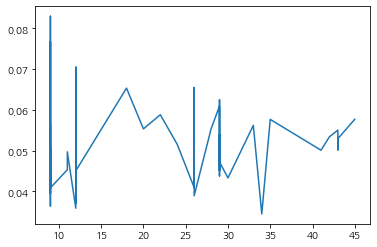

In [361]:
plt.plot(by_cnt['cnt'],by_cnt['error_ratio'])

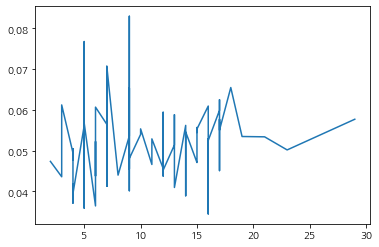

In [357]:
plt.plot(by_cnt['Outlier'],by_cnt['error_ratio'])

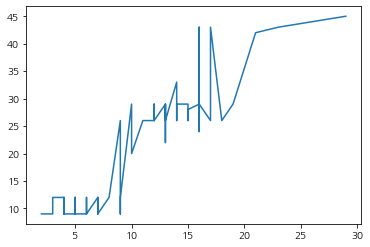

In [359]:
plt.plot(by_cnt['Outlier'],by_cnt['cnt'])

In [ ]:
plt.plot(by_cnt['Outlier'],by_cnt['cnt'])

In [362]:
num=2
up=by_cnt.loc[0:num]['sum']
lo=by_cnt.loc[len(by_cnt)-num-1:len(by_cnt)]['sum']

up_count=by_cnt.loc[0:num]['cnt']
lo_count=by_cnt.loc[len(by_cnt)-num-1:len(by_cnt)]['cnt']

KeyError: 'sum'

In [335]:
lo=lo.reset_index(drop=True)

In [336]:
lo_count=lo_count.reset_index(drop=True)

In [233]:
up1=[up_count[0]*2000,up_count[1]*2000,up_count[2]*2000,lo_count[0]*2000,lo_count[1]*2000,lo_count[2]*2000]
down1=[up[0],up[1],up[2],lo[0],lo[1],lo[2]]
table=[up1,down1]

In [234]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

print("chi-square test")
print("chisq:{0:0.3f}".format(stat))
print('p:{0:0.3f}'.format(p))
print("degree of freedom:{}".format(dof))
print('expected_value::\n{}'.format(expected.round(3)))

dof=5
[[90377.94442842 85970.6999327  85745.68551101 17951.78348236
  17904.31208538 18049.57456014]
 [ 4814.05557158  4579.3000673   4567.31448899   956.21651764
    953.68791462   961.42543986]]
chi-square test
chisq:61.730
p:0.000
degree of freedom:5
expected_value::
[[90377.944 85970.7   85745.686 17951.783 17904.312 18049.575]
 [ 4814.056  4579.3    4567.314   956.217   953.688   961.425]]


In [90]:
by_path=by_path_data.sort_values(by='Path',ascending=True)
by_path['error_ratio']=by_path['error_ratio']*100
by_path=by_path.reset_index(drop=True)
by_path

,Outlier,Path,cnt,ratio,mean,sum,error_ratio
0,16,11111,29,0.551724,104.965517,3044,5.248276
1,6,11122,12,0.500000,87.500000,1050,4.375000
2,16,11133,30,0.533333,86.533333,2596,4.326667
3,3,11211,12,0.250000,122.416667,1469,6.120833
4,16,11222,41,0.390244,100.170732,4107,5.008537
5,7,11233,12,0.583333,141.000000,1692,7.050000
6,12,11311,29,0.413793,97.000000,2813,4.850000
7,4,11322,12,0.333333,98.833333,1186,4.941667
8,16,11333,29,0.551724,95.689655,2775,4.784483
9,17,12111,29,0.586207,90.137931,2614,4.506897


In [84]:
begin_1=by_path.loc[0:8]['error_ratio']
mean_1=np.sum(begin_1.values)/9
mean_1

5.189495763635797

In [87]:
begin_2=by_path.loc[9:17]['error_ratio']
mean_2=np.sum(begin_2.values)/9
mean_2

4.8853216068733305

In [88]:
begin_3=by_path.loc[18:26]['error_ratio']
mean_3=np.sum(begin_3.values)/9
mean_3

5.058059477425957

In [129]:
by_path

,Outlier,Path,cnt,ratio,mean,sum,error_ratio
0,16,11111,29,0.551724,104.965517,3044,5.248276
1,6,11122,12,0.500000,87.500000,1050,4.375000
2,16,11133,30,0.533333,86.533333,2596,4.326667
3,3,11211,12,0.250000,122.416667,1469,6.120833
4,16,11222,41,0.390244,100.170732,4107,5.008537
5,7,11233,12,0.583333,141.000000,1692,7.050000
6,12,11311,29,0.413793,97.000000,2813,4.850000
7,4,11322,12,0.333333,98.833333,1186,4.941667
8,16,11333,29,0.551724,95.689655,2775,4.784483
9,17,12111,29,0.586207,90.137931,2614,4.506897


In [130]:
layer_1=[]
for j in range(3):
    layer_2=[]
    for i in range(3):
        ratio_sum=0
        for k in range(9):
            ratio_sum+=by_path.loc[k+9*i+27*j]['error_ratio']
        layer_2.append(ratio_sum/9)
    layer_1.append(layer_2)

layer_1
    
    
    

[[5.189495763635797, 4.8853216068733305, 5.058059477425957],
 [4.8509532931946735, 5.069567197914899, 4.753347191854943],
 [6.5673680640347305, 5.511288345590671, 4.102340651360259]]

In [138]:
layer_1=[]
for j in range(3):
    layer_2=[]
    for i in range(3):
        layer_3=[]
        for k in range(3):
            ratio_sum=0
            for h in range(3):
                ratio_sum+=by_path.loc[k+9*i+27*j+h]['error_ratio']
            layer_3.append(ratio_sum/3)
        layer_2.append(layer_3)
    layer_1.append(layer_2)

In [354]:
layer_1[1]

[[5.1563218390804595, 4.26800766283525, 4.546975916803503],
 [5.380914750957854, 5.108396464646464, 5.149414983164983],
 [5.124081196581197, 4.821944444444444, 5.067164082687339]]

[[6.538105413105413, 7.122079772079772, 6.684725274725275],
 [5.022008547008547, 4.914102564102564, 5.099890677797656],
 [3.975783475783475, 3.9294871794871793, 3.8640732361320596]]

[3.975783475783475, 3.9294871794871793, 3.8640732361320596]